<a href="https://colab.research.google.com/github/jlgelpi/BioPhysics/blob/master/enzyme_kinetics_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def michaelis_menten_func(s, vm ,km):
  return vm * s / (km + s)

def competitive_inh_func(s, i, vm ,km, ki):
  return vm * s / (km (1 + i/ki) + s)

def acompetitive_inh_func(s, i, vm ,km, ki):
  return vm * s / (km + s * (1 + i/ki))

def lineweaver_burk_func(s, vm, km):
  return 1/vm + km/vm/s

In [ ]:
s = np.array([0.2, 0.4, 0.8, 1.6, 3.2])
i = np.array([0.0, 1.5, 1.5])
vo = np.array([1.67, 2.86, 4.44, 6.15, 7.62])
via = np.array([0.625, 1.176, 2.110, 3.480, 5.16])
vib = np.array([0.83, 1.43, 2.22, 3.08, 3.81])

In [ ]:
[vm, km], pcovo = curve_fit(michaelis_menten_func, s, vo)
[vma, kma], pcova = curve_fit(michaelis_menten_func, s, via)
[vmb, kmb], pcovb = curve_fit(michaelis_menten_func, s, vib)

In [ ]:
vm, km

(9.99761261755516, 0.999836186424034)

In [ ]:
vma, kma

(9.976308094138021, 2.9866329445904154)

In [ ]:
vmb, kmb


(5.0046414747207555, 1.0020019641941045)

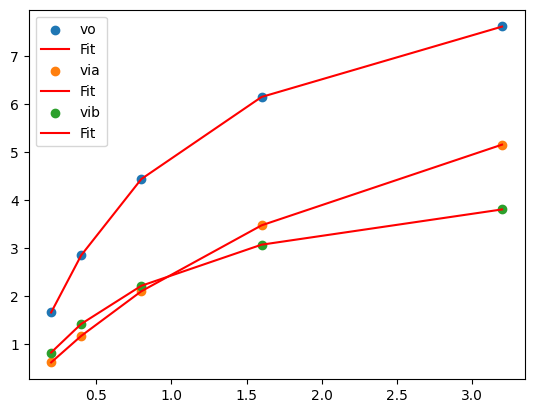

In [ ]:
plt.scatter(s, vo, label="vo")
plt.plot(s, michaelis_menten_func(s, vm, km), "r-", label="Fit")
plt.scatter(s, via, label="via")
plt.plot(s, michaelis_menten_func(s, vma, kma), "r-", label="Fit")
plt.scatter(s, vib, label="vib")
plt.plot(s, michaelis_menten_func(s, vmb, kmb), "r-", label="Fit")
plt.legend()
plt.show()

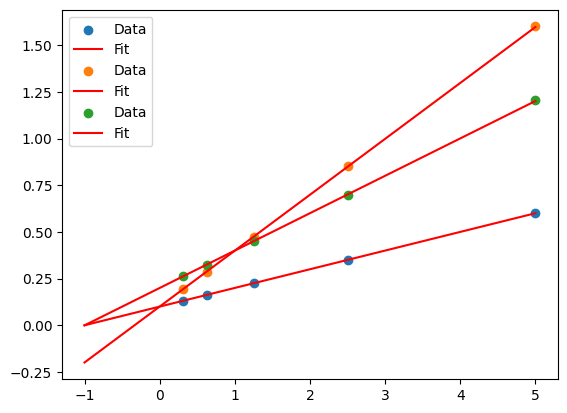

In [ ]:
s0 = np.append(s, -km)
plt.scatter(1/s, 1/vo, label="Data")
plt.plot(1/s0, lineweaver_burk_func(s0, vm, km), "r-", label="Fit")
plt.scatter(1/s, 1/via, label="Data")
plt.plot(1/s0, lineweaver_burk_func(s0, vma, kma), "r-", label="Fit")
plt.scatter(1/s, 1/vib, label="Data")
plt.plot(1/s0, lineweaver_burk_func(s0, vmb, kmb), "r-", label="Fit", )
plt.legend()
plt.show()